In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage import io
from skimage import exposure
from skimage import filters
from skimage import measure
from scipy import ndimage

(3272, 1883) 1.6230667651759988e-07 1.0


Text(0.5, 1.0, 'histogram of gray values')

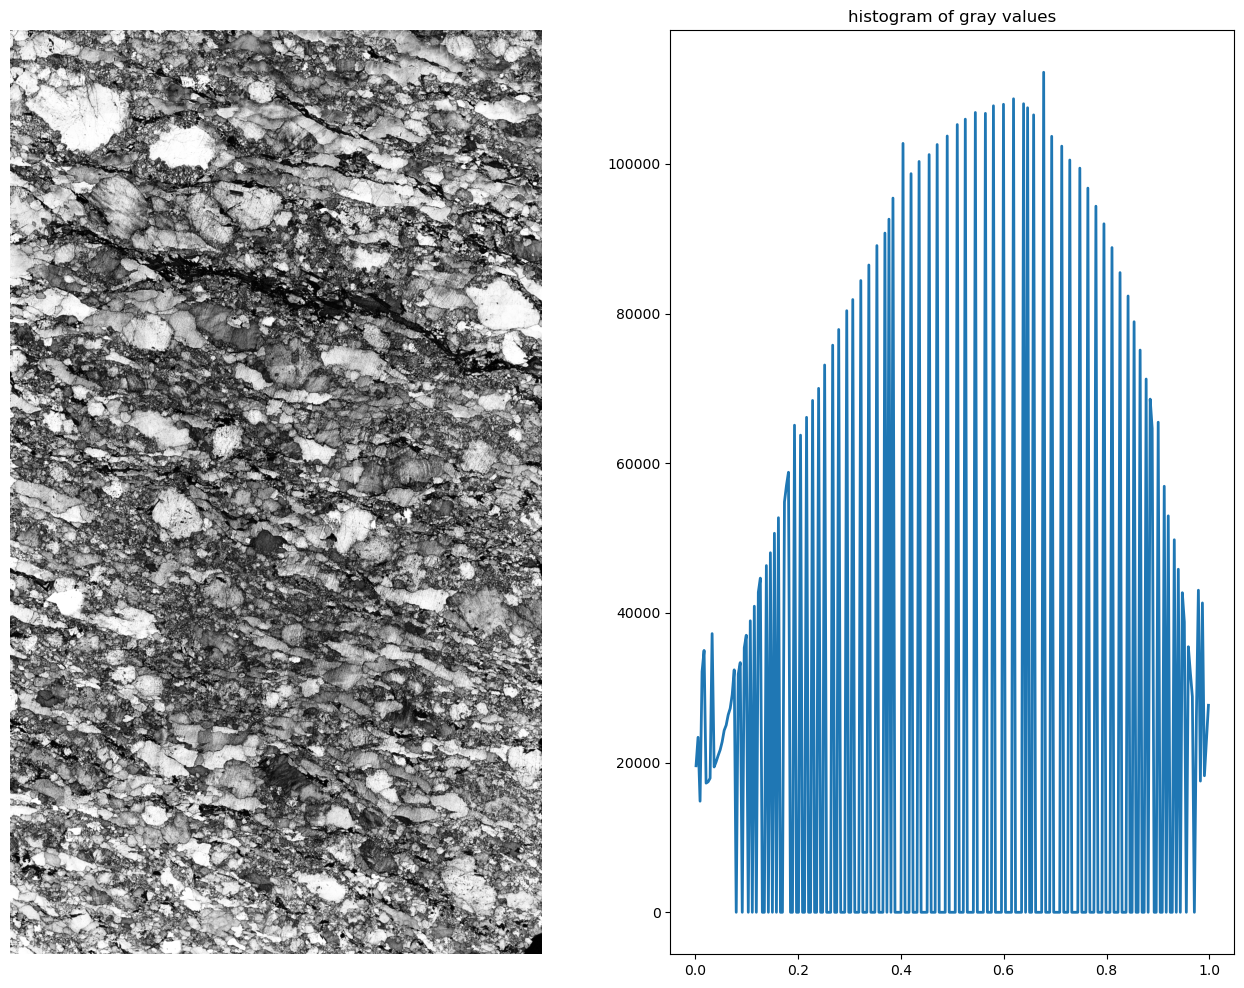

In [8]:
# import cropped band contrast image
band_contrast_raw = io.imread('../images/cropped_band_image.png', as_gray=True)

# equalize histogram of band contrast image
band_eq = exposure.equalize_hist(band_contrast_raw)
print(band_eq.shape, band_eq.min(), band_eq.max())

# display image and hist stats
hist, hist_centers = exposure.histogram(band_eq)

fig, axs = plt.subplots(1, 2, figsize=(16, 12))
axs[0].imshow(band_eq, cmap=plt.cm.gray)
axs[0].axis('off')
axs[1].plot(hist_centers, hist, lw=2)
axs[1].set_title('histogram of gray values')

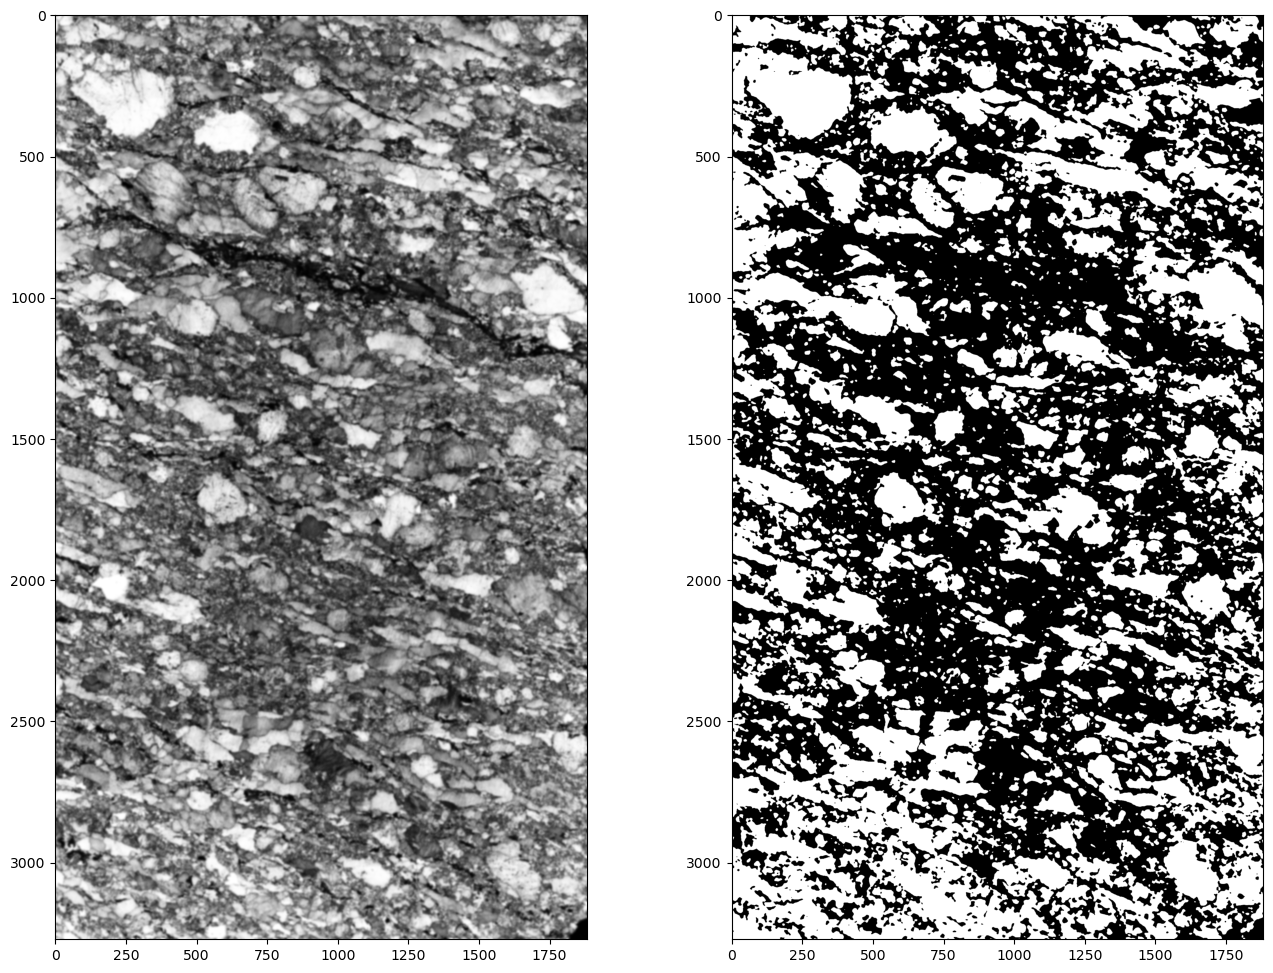

In [9]:
# filter equalized band contrast image to extract blobs
# TODO play with sigma value and threshold for blobs
filtered = filters.gaussian(band_eq, sigma=(256 / (4.0 * 20)))
blobs = filtered > filtered.mean()

# show filtered image and detected blobs
fig, axs = plt.subplots(1, 2, figsize=(16, 12))
axs[0].imshow(filtered, cmap='gray')
axs[1].imshow(blobs, cmap='gray')

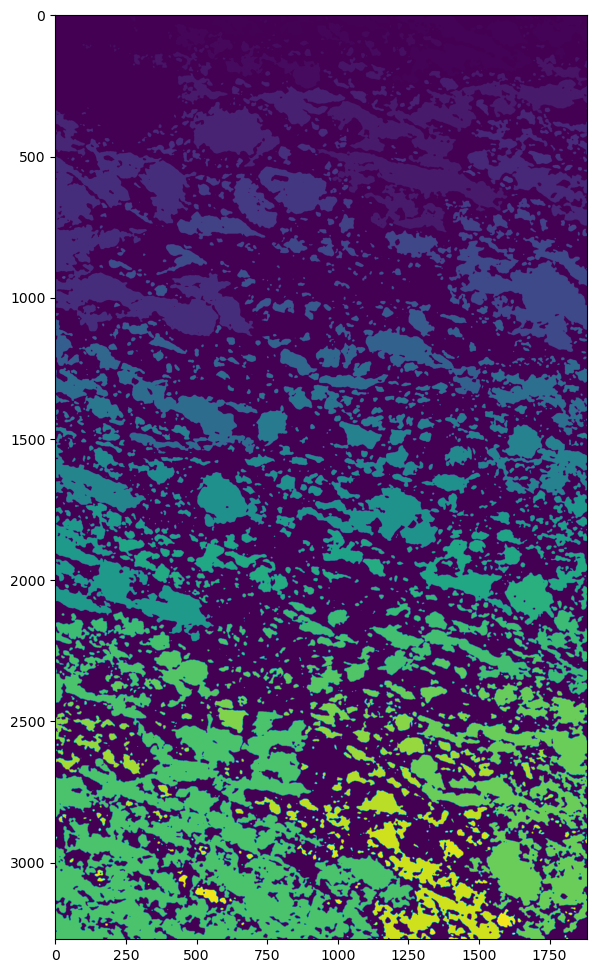

In [10]:
# label components
# label only foreground connected components
blob_labels = measure.label(blobs, background=0)

# show us your labels
fig, axs = plt.subplots(1, figsize=(16, 12))
axs.imshow(blob_labels)

(3272, 1883) float64 0.0 109.20164833920778


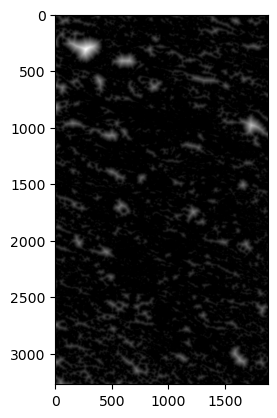

In [12]:
distance = ndimage.distance_transform_edt(blobs)
print(distance.shape, distance.dtype, distance.min(), distance.max())
plt.imshow(distance)